# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python_headless-4.5.3.56-cp37-cp37m-manylinux2014_x86_64.whl (37.1 MB)
  Using cached bokeh-2.1.1.tar.gz (19.3 MB)
  Using cached torchvision-0.12.0-cp37-cp37m-manylinux1_x86_64.whl (21.0 MB)
  Using cached tqdm-4.63.0-py2.py3-none-any.whl (76 kB)
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached pytest-7.1.1-py3-none-any.whl (297 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached ipykernel-4.10.0-py3-none-any.whl (109 kB)
  Using cached widgetsnbextension-3.6.6-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
  Using cached py-1.11.0-py2.py3-none-any.whl (98 kB)
  Using cached to

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
!pip install --upgrade jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension



Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 139 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 68.5 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbexte

In [12]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=32)



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?



By normalizing the pixel values of the images, we ensure that the data falls within a specific range, typically between 0 and 1 or -1 and 1. This helps in stabilizing the training process, making it easier for the optimizer to converge

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


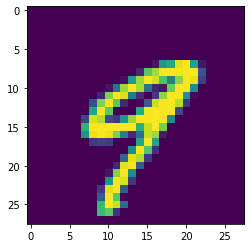

7


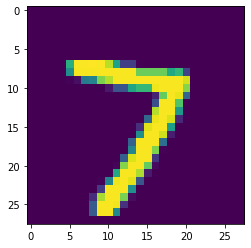

9


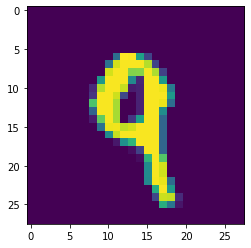

0


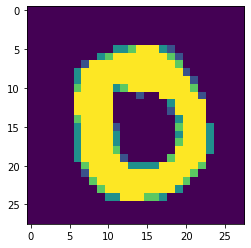

9


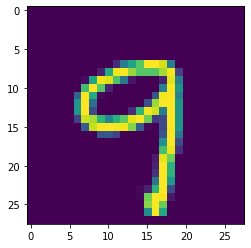

In [8]:
# Explore data
show5(train_loader)


In [49]:
# Shape of training data
print("Training Data Shape:", training_data.data.shape)

# Shape of test data
print("Test Data Shape:", test_data.data.shape)



Training Data Shape: torch.Size([60000, 28, 28])
Test Data Shape: torch.Size([10000, 28, 28])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [17]:


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Adjust the input size for the first linear layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten the output before passing it to the linear layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = (self.fc3(x))
        return x



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [37]:
net = Net()   
learning_rate = 0.01
momentum = 0.9

optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum = momentum)
criterion = nn.CrossEntropyLoss()
        
    

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [38]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
net.to(device)



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [39]:
train_losses = []
train_accuracies = []

# Training loop with validation
for epoch in range(10):
    # Training loop
    net.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs = inputs.to(device)
            labels = labels.to(device)
            
        # Zero the gradients
        optimizer.zero_grad()  
        
        # Forward pass
        outputs = net(inputs)  
        
        # Compute loss
        loss = criterion(outputs, labels)  
        
        # Backpropagation
        loss.backward()  
        
        # Update weights
        optimizer.step()  
        
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    train_losses.append(train_loss)
    # Calculate average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)
    
    # Validation loop
    net.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    
    
    # Print training metrics
    print(f"Epoch {epoch + 1}/{10}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%")


Epoch 1/10:
  Train Loss: 0.2513, Train Accuracy: 91.98%
Epoch 2/10:
  Train Loss: 0.0573, Train Accuracy: 98.30%
Epoch 3/10:
  Train Loss: 0.0399, Train Accuracy: 98.78%
Epoch 4/10:
  Train Loss: 0.0313, Train Accuracy: 99.03%
Epoch 5/10:
  Train Loss: 0.0274, Train Accuracy: 99.13%
Epoch 6/10:
  Train Loss: 0.0213, Train Accuracy: 99.33%
Epoch 7/10:
  Train Loss: 0.0183, Train Accuracy: 99.42%
Epoch 8/10:
  Train Loss: 0.0161, Train Accuracy: 99.44%
Epoch 9/10:
  Train Loss: 0.0153, Train Accuracy: 99.48%
Epoch 10/10:
  Train Loss: 0.0121, Train Accuracy: 99.60%


Plot the training loss (and validation loss/accuracy, if recorded).

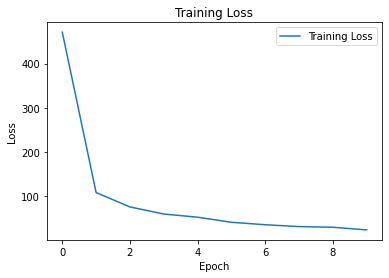

In [40]:
 # Plot training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()
    



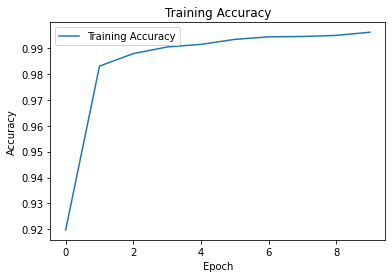

In [41]:
# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()
    


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [42]:
def test_model(net, test_loader):
    # Set the model to evaluation mode
    net.eval()
    
    # Initialize variables to track correct predictions
    correct_predictions = 0
    
    # Iterate over the test loader
    for inputs, labels in test_loader:
        # Check for GPU availability
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        # Forward pass
        outputs = net(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update correct predictions
        correct_predictions += (predicted == labels).sum().item()
    
    # Compute percentage of correct predictions
    accuracy = correct_predictions / len(test_loader.dataset) * 100
    
    return accuracy

# Test the model
accuracy = test_model(net, test_loader)
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 98.94%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

## hyperparameters tuning  

* Changing the optimizer to ADAM 
* Removed the momentum
* Training iteration to 10 epoch
* Learning rate to 0.001

In [43]:
 
learning_rate = 0.001


optimizer = optim.Adam(net.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [44]:
# Lists to store training metrics
train_losses = []
train_accuracies = []


# Training loop with validation
for epoch in range(10):
    # Training loop
    net.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0
    
    # Iterate over the training data
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Move inputs and labels to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)
            
        # Zero the gradients
        optimizer.zero_grad()  
        
        # Forward pass
        outputs = net(inputs)  
        
        # Compute loss
        loss = criterion(outputs, labels)  
        
        # Backpropagation
        loss.backward()  
        
        # Update weights
        optimizer.step()  
        
        # Track training metrics
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        
    # Append training loss to the list
    train_losses.append(train_loss)
    
    # Calculate average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_accuracies.append(train_accuracy)
    
    # Validation loop
    net.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0

    # Print training metrics
    print(f"Epoch {epoch + 1}/{10}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%")


Epoch 1/10:
  Train Loss: 0.0206, Train Accuracy: 99.37%
Epoch 2/10:
  Train Loss: 0.0180, Train Accuracy: 99.42%
Epoch 3/10:
  Train Loss: 0.0160, Train Accuracy: 99.50%
Epoch 4/10:
  Train Loss: 0.0125, Train Accuracy: 99.63%
Epoch 5/10:
  Train Loss: 0.0139, Train Accuracy: 99.56%
Epoch 6/10:
  Train Loss: 0.0121, Train Accuracy: 99.61%
Epoch 7/10:
  Train Loss: 0.0099, Train Accuracy: 99.69%
Epoch 8/10:
  Train Loss: 0.0104, Train Accuracy: 99.67%
Epoch 9/10:
  Train Loss: 0.0105, Train Accuracy: 99.66%
Epoch 10/10:
  Train Loss: 0.0080, Train Accuracy: 99.72%


### After changing the hyperparameters the trainig accuracy increased up to 99.72% 

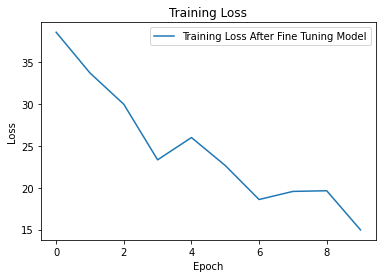

In [45]:
 # Plot training loss
plt.plot(train_losses, label='Training Loss After Fine Tuning Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()
    


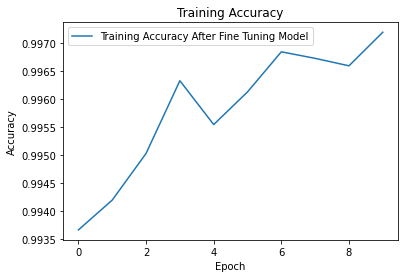

In [46]:
# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy After Fine Tuning Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()
    


In [47]:
def test_model(net, test_loader):
    # Set the model to evaluation mode
    net.eval()
    
    # Initialize variables to track correct predictions
    correct_predictions = 0
    
    # Iterate over the test loader
    for inputs, labels in test_loader:
        # Check for GPU availability
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        # Forward pass
        outputs = net(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update correct predictions
        correct_predictions += (predicted == labels).sum().item()
    
    # Compute percentage of correct predictions
    accuracy = correct_predictions / len(test_loader.dataset) * 100
    
    return accuracy

# Test the model
accuracy = test_model(net, test_loader)
print(f" Test Accuracy after hyper parameters tuning: {accuracy:.2f}%")


 Test Accuracy after hyper parameters tuning: 99.10%


## Saving your model
Using `torch.save`, save your model for future loading.

In [48]:
model_path = "model.pth"

# Save the model
torch.save(net.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to model.pth
